In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [3]:
for i in range(len(iris.target)):
    print("Example %d: label %s , features %s" %(
        i, iris.target[i],iris.data[i]
    ))

Example 0: label 0 , features [5.1 3.5 1.4 0.2]
Example 1: label 0 , features [4.9 3.  1.4 0.2]
Example 2: label 0 , features [4.7 3.2 1.3 0.2]
Example 3: label 0 , features [4.6 3.1 1.5 0.2]
Example 4: label 0 , features [5.  3.6 1.4 0.2]
Example 5: label 0 , features [5.4 3.9 1.7 0.4]
Example 6: label 0 , features [4.6 3.4 1.4 0.3]
Example 7: label 0 , features [5.  3.4 1.5 0.2]
Example 8: label 0 , features [4.4 2.9 1.4 0.2]
Example 9: label 0 , features [4.9 3.1 1.5 0.1]
Example 10: label 0 , features [5.4 3.7 1.5 0.2]
Example 11: label 0 , features [4.8 3.4 1.6 0.2]
Example 12: label 0 , features [4.8 3.  1.4 0.1]
Example 13: label 0 , features [4.3 3.  1.1 0.1]
Example 14: label 0 , features [5.8 4.  1.2 0.2]
Example 15: label 0 , features [5.7 4.4 1.5 0.4]
Example 16: label 0 , features [5.4 3.9 1.3 0.4]
Example 17: label 0 , features [5.1 3.5 1.4 0.3]
Example 18: label 0 , features [5.7 3.8 1.7 0.3]
Example 19: label 0 , features [5.1 3.8 1.5 0.3]
Example 20: label 0 , features

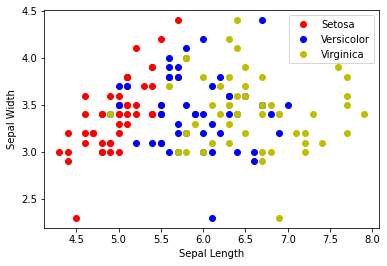

In [7]:
import matplotlib.pyplot as plt

sepal = iris.data[:,0:2]
kind = iris.target

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(sepal[kind ==0][:,0], sepal[kind==0][:,1], "ro", label = 'Setosa')
plt.plot(sepal[kind ==1][:,0], sepal[kind==0][:,1], "bo", label = 'Versicolor')
plt.plot(sepal[kind ==2][:,0], sepal[kind==0][:,1], "yo", label = 'Virginica')

plt.legend()

In [21]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state = 4)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors= 6)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
scores

0.9666666666666667

In [24]:
#GridSearch CV 로 최적하라이퍼 파라미터 찾기
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

dtree = KNeighborsClassifier()
grid_parameters = {'n_neighbors' : [3,4,5,6,7,8,9,10] }
grid_tree = GridSearchCV(dtree, param_grid = grid_parameters, cv=3 , refit = True)
grid_tree.fit(X_train, y_train)

scores = pd.DataFrame(grid_tree.cv_results_)
scores[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score',
'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'n_neighbors': 3},0.966667,7,0.975,0.925,1.000
1,{'n_neighbors': 4},0.958333,8,0.950,0.925,1.000
2,{'n_neighbors': 5},0.975000,3,0.975,0.950,1.000
3,{'n_neighbors': 6},0.975000,3,0.975,0.975,0.975
4,{'n_neighbors': 7},0.983333,2,0.975,1.000,0.975
5,{'n_neighbors': 8},0.975000,3,0.975,0.975,0.975
6,{'n_neighbors': 9},0.991667,1,0.975,1.000,1.000
7,{'n_neighbors': 10},0.975000,3,0.975,0.975,0.975


In [25]:
#위 결과를 통해 rank_test_score가 1인 k = 9일때 가장 에측성능이 1위. 

print('GridSearchCV 최고 정확도 : {0:.4f}'.format (grid_tree.best_score_))

GridSearchCV 최고 정확도 : 0.9917
